In [ ]:
import matplotlib.pyplot as plt
import numpy as np              
import pandas as pd             

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Define Directories for train, test & Validation Set
train_path = '/content/drive/MyDrive/Final Year Project/DriverDrowsinessDetection/highDimensionEyeImageDataset/train'
test_path = '/content/drive/MyDrive/Final Year Project/DriverDrowsinessDetection/highDimensionEyeImageDataset/test'
valid_path = '/content/drive/MyDrive/Final Year Project/DriverDrowsinessDetection/highDimensionEyeImageDataset/val'
#The batch refers to the number of training examples utilized in one iteration
batch_size = 16
#The dimension of the image
img_height = 40
img_width = 40

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Create Image Data Generator for Train Set
image_gen = ImageDataGenerator(
                                  rescale = 1./255,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = True,          
                               )
# Create Image Data Generator for Test/Validation Set
test_data_gen = ImageDataGenerator(rescale = 1./255)

In [ ]:
train = image_gen.flow_from_directory(
      train_path,
      target_size=(img_height, img_width),
      color_mode='grayscale',
      class_mode='binary',
      batch_size=batch_size
      )
test = test_data_gen.flow_from_directory(
      test_path,
      target_size=(img_height, img_width),
      color_mode='grayscale',
      shuffle=False,  
      class_mode='binary',
      batch_size=batch_size
      )
valid = test_data_gen.flow_from_directory(
      valid_path,
      target_size=(img_height, img_width),
      color_mode='grayscale',
      class_mode='binary', 
      batch_size=batch_size
      )

Found 930 images belonging to 2 classes.
Found 466 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


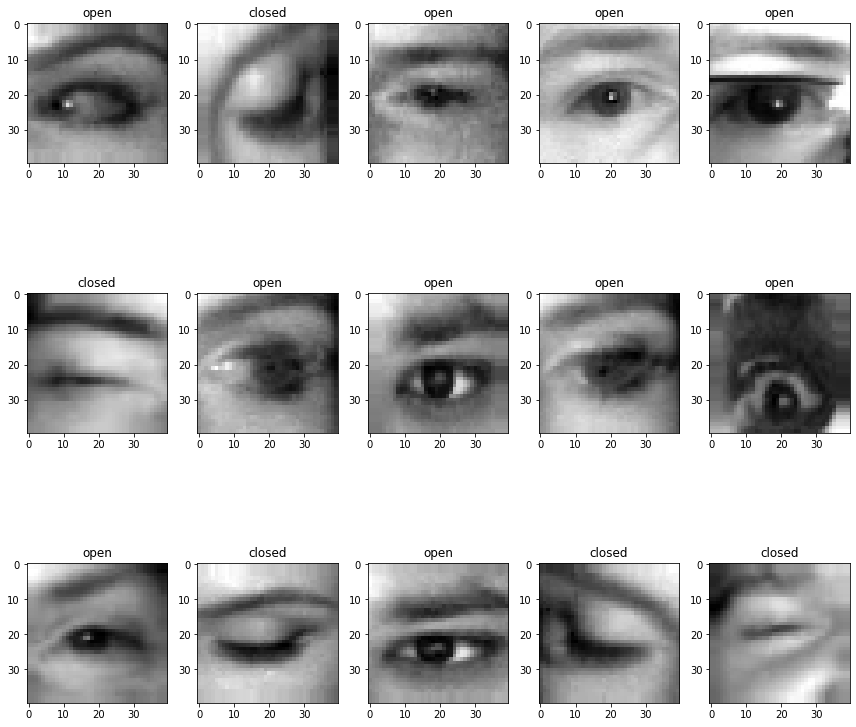

In [ ]:
plt.figure(figsize=(12, 12))
for i in range(0, 15):
    plt.subplot(3, 5, i+1)
    for X, Y in train:
        image = X[0]        
        dic = {0:'closed', 1:'open'}
        plt.title(dic.get(Y[0]))
        plt.imshow(np.squeeze(image),cmap='gray',interpolation='nearest')
        break
plt.tight_layout()
plt.show()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau

In [ ]:
cnn = Sequential()
cnn.add(Conv2D(32, (5, 5), activation="relu", input_shape=(img_width, img_height, 1)))
cnn.add(MaxPooling2D(pool_size = (2, 2)))
cnn.add(Conv2D(32, (5, 5), activation="relu", input_shape=(img_width, img_height, 1)))
cnn.add(MaxPooling2D(pool_size = (2, 2)))
cnn.add(Conv2D(32, (5, 5), activation="relu", input_shape=(img_width, img_height, 1)))
cnn.add(MaxPooling2D(pool_size = (2, 2)))
cnn.add(Flatten())
cnn.add(Dense(activation = 'relu', units = 64))
cnn.add(Dense(activation = 'sigmoid', units = 1))
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
cnn.summary()


Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 38, 38, 32)        320       
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 19, 19, 32)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 17, 17, 32)        9248      
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 6, 6, 32)          9248      
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 3, 3, 32)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 288)              

In [ ]:
#MODEL SUMMARY
# Hyperparameters of Conv2D
Conv2D(
    32,
    kernel_size = (5,5),
    strides=(1, 1),
    padding="valid",
    activation="relu",
    input_shape=(img_height,img_width,1)
    )
# Hyperparameters of MaxPooling2D 
MaxPooling2D(
    pool_size=(2, 2), strides=None, padding="valid"
    )

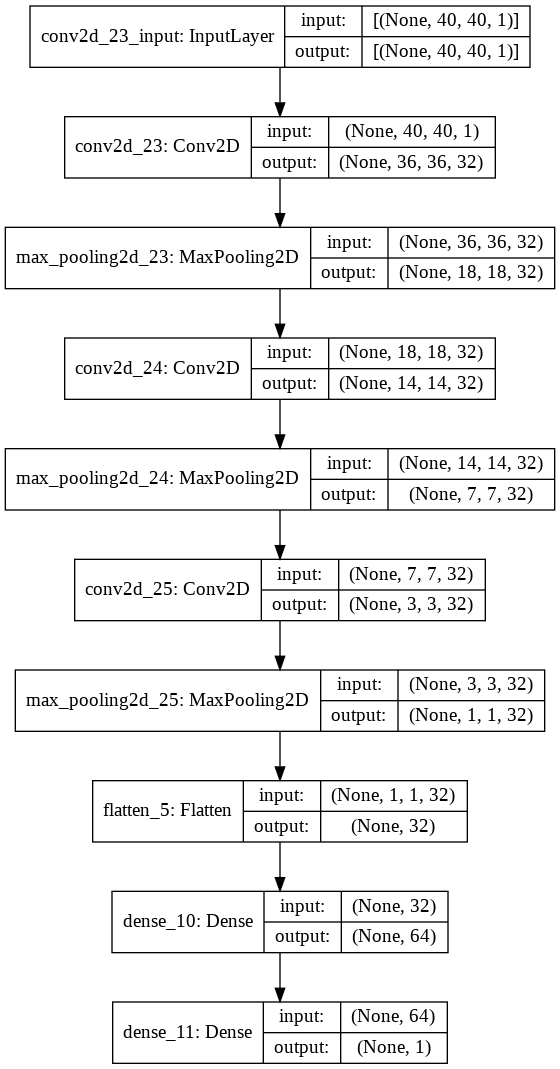

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(cnn,show_shapes=True, show_layer_names=True, rankdir='TB', expand_nested=True)

In [ ]:
early = EarlyStopping(monitor='val_loss', mode='min', patience=3)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', patience = 2, verbose=1,factor=0.3, min_lr=0.000001)
callbacks_list = [ early, learning_rate_reduction]

In [ ]:
from sklearn.utils.class_weight import compute_class_weight
weights = compute_class_weight('balanced', np.unique(train.classes), train.classes)
cw = dict(zip( np.unique(train.classes), weights))
print(cw)

{0: 1.0496613995485327, 1: 0.9548254620123203}


In [ ]:
cnn.fit(train,epochs=20, validation_data=valid, class_weight=cw, callbacks=callbacks_list)

Epoch 1/20
59/59 [==============================] - 5s 74ms/step - loss: 0.6847 - accuracy: 0.5419 - val_loss: 0.6824 - val_accuracy: 0.5625
Epoch 2/20
59/59 [==============================] - 4s 71ms/step - loss: 0.5384 - accuracy: 0.7527 - val_loss: 0.3468 - val_accuracy: 0.8750
Epoch 3/20
59/59 [==============================] - 4s 71ms/step - loss: 0.2998 - accuracy: 0.8849 - val_loss: 0.1679 - val_accuracy: 1.0000
Epoch 4/20
59/59 [==============================] - 4s 71ms/step - loss: 0.2368 - accuracy: 0.8968 - val_loss: 0.1461 - val_accuracy: 1.0000
Epoch 5/20
59/59 [==============================] - 4s 71ms/step - loss: 0.2036 - accuracy: 0.9161 - val_loss: 0.1073 - val_accuracy: 1.0000
Epoch 6/20
59/59 [==============================] - 4s 71ms/step - loss: 0.2124 - accuracy: 0.9065 - val_loss: 0.1131 - val_accuracy: 1.0000
Epoch 7/20
59/59 [==============================] - 4s 71ms/step - loss: 0.1941 - accuracy: 0.9129 - val_loss: 0.0823 - val_accuracy: 1.0000
Epoch 8/20
59

In [ ]:
test_accu = cnn.evaluate(test)
print('The testing accuracy is :',test_accu[1]*100, '%')

30/30 [==============================] - 1s 34ms/step - loss: 0.9627 - accuracy: 0.7918
The testing accuracy is : 79.18455004692078 %


In [ ]:
cnn.save('/content/drive/MyDrive/Final Year Project/DriverDrowsinessDetection/model.h5', overwrite=True)

In [ ]:
from keras.models import load_model
import numpy as np
import cv2
#load the trained model
model = load_model('/content/drive/MyDrive/Final Year Project/DriverDrowsinessDetection/model4033.h5')

In [ ]:
#single static image prediction
categories = ['closed','open']
def prepare(filepath):
  img_size = 40
  img_array = cv2.imread(filepath,cv2.IMREAD_GRAYSCALE)
  new_array = cv2.resize(img_array,(img_size,img_size))
  return new_array.reshape(-1,img_size,img_size,1)

closedEyeFilepath = '/content/drive/MyDrive/Final Year Project/DriverDrowsinessDetection/highDimensionEyeImageDataset/test/closed/closed_eye_0024.jpg_face_2_L.jpg'
openEyeFilepath = '/content/drive/MyDrive/Final Year Project/DriverDrowsinessDetection/highDimensionEyeImageDataset/test/open/Alina_Kabaeva_0001_L.jpg'
predictions = model.predict([prepare(closedEyeFilepath)])
print(categories[int(predictions[0][0])])
print(predictions)

In [ ]:
import os
import cv2
def prepare(filepath):
  img_size = 40
  img_array = cv2.imread(filepath,cv2.IMREAD_GRAYSCALE)
  new_array = cv2.resize(img_array,(img_size,img_size))
  return new_array.reshape(-1,img_size,img_size,1)


In [ ]:
# # !pip install playsound
# # from playsound import playsound 
# path = '/content/drive/MyDrive/Final Year Project/DriverDrowsinessDetection/Execution/closedeye'
# # total_frames = len(os.listdir(path))
# # print(total_frames)
# score = 0
# for img in os.listdir(path):
#   img_path = os.path.join(path,img)
#   pred = model.predict([prepare(img_path)])
#   # print("{} is {}".format(img,pred))
#   if(int(pred[0][0]) == 0):
#     score += 1
#   else:
#     score -= 1
#   if(score < 0):
#     score = 0
#   if(score == 15):
#     print("Drowsiness detected")
#     score = 0

In [ ]:
# !pip install playsound
# from playsound import playsound 
path = '/content/drive/MyDrive/Final Year Project/DriverDrowsinessDetection/Execution/drowsy'
total_frames = len(os.listdir(path))
# print(total_frames)
filename = "drowsy"
score = 0
flag = 0
cameraFps = 26
threshold = cameraFps / 2
for img in range(total_frames):
  img_name = filename + str(img + 1) + ".png"
  img_path = os.path.join(path,(img_name))
  pred = model.predict([prepare(img_path)])
  print("{} is {}".format(img_name,pred))
  if(int(pred[0][0]) == 0):
    score += 1
  else:
    score -= 1
  if(score < 0):
    score = 0
  if(score == threshold):
    print("\nDrowsiness detected\n")
    flag = 1
    score = 0

#no drowsiness condition
if flag == 0:
  print("Drowsiness not detected")
